### CLUSTERING 

In [1]:
pip install graphviz


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [95]:
# Import statements up to Week 9

# Numerical Operations and Data Manipulation 
import pandas as pd
import numpy as np
import numpy.linalg as la
from collections import Counter
import math
import random
 
# Linear Algebra and Matrix Operations
from scipy.sparse import csr_matrix
from scipy.linalg import svd
from scipy.sparse.linalg import svds

# Data Preprocessing and Machine Learning 
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import silhouette_samples, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, completeness_score, homogeneity_score
from sklearn.feature_extraction import DictVectorizer, text
from sklearn import preprocessing, model_selection, decomposition, feature_selection
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Plotting and Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import graphviz
from IPython.display import Image

# Time-Related Functions
import time

# Miscellaneous
from operator import itemgetter, attrgetter
import importlib
import re

In [3]:
# Setting pandas to display all rows and  columns values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Ignore warning for plots
import warnings
warnings.filterwarnings('ignore', message='.*use_inf_as_na.*')

# Instructions on how to run this Notebook:
### 1. Run the part 1 Data-preprocessing Notebook to download the fully merged/cleaned dataset.
### 2. In the cell below, comment/uncomment the 2nd 'pathname' lines and add the location of the downloaded dataset.
### - df_anime_rating.csv
### 3. Run the Notebook to see the results.

## Data Exploration: anime.csv

In [4]:
# FULL DATASET
pathname = 'C:/Users/nisha/Downloads/df_anime_rating.csv'

# pathname = 'ADD PATHNAME HERE'

df_anime_rating = pd.read_csv(pathname)

In [5]:
df_anime_rating.columns

Index(['anime_id', 'name', 'episodes', 'average_rating', 'members',
       'genre_Action', 'genre_Adventure', 'genre_Cars', 'genre_Comedy',
       'genre_Dementia', 'genre_Demons', 'genre_Drama', 'genre_Fantasy',
       'genre_Game', 'genre_Historical', 'genre_Horror', 'genre_Josei',
       'genre_Kids', 'genre_Magic', 'genre_Martial Arts', 'genre_Mecha',
       'genre_Military', 'genre_Music', 'genre_Mystery', 'genre_Parody',
       'genre_Police', 'genre_Psychological', 'genre_Romance', 'genre_Samurai',
       'genre_School', 'genre_Sci-Fi', 'genre_Seinen', 'genre_Shoujo',
       'genre_Shoujo Ai', 'genre_Shounen', 'genre_Shounen Ai',
       'genre_Slice of Life', 'genre_Space', 'genre_Sports',
       'genre_Super Power', 'genre_Supernatural', 'genre_Thriller',
       'genre_Unknown', 'genre_Vampire', 'type_Movie', 'type_Music',
       'type_ONA', 'type_OVA', 'type_Special', 'type_TV', 'type_Unknown',
       'user_id', 'user_rating'],
      dtype='object')

In [6]:
df_anime_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247448 entries, 0 to 5247447
Data columns (total 53 columns):
 #   Column               Dtype  
---  ------               -----  
 0   anime_id             int64  
 1   name                 object 
 2   episodes             int64  
 3   average_rating       float64
 4   members              int64  
 5   genre_Action         int64  
 6   genre_Adventure      int64  
 7   genre_Cars           int64  
 8   genre_Comedy         int64  
 9   genre_Dementia       int64  
 10  genre_Demons         int64  
 11  genre_Drama          int64  
 12  genre_Fantasy        int64  
 13  genre_Game           int64  
 14  genre_Historical     int64  
 15  genre_Horror         int64  
 16  genre_Josei          int64  
 17  genre_Kids           int64  
 18  genre_Magic          int64  
 19  genre_Martial Arts   int64  
 20  genre_Mecha          int64  
 21  genre_Military       int64  
 22  genre_Music          int64  
 23  genre_Mystery        int64  
 24

In [7]:
df_anime_rating.shape

(5247448, 53)

In [8]:
df_anime_rating.head()

anime_id            name  episodes  average_rating  members  genre_Action  \
0     32281  Kimi no Na wa.         1            9.37   200630             0   
1     32281  Kimi no Na wa.         1            9.37   200630             0   
2     32281  Kimi no Na wa.         1            9.37   200630             0   
3     32281  Kimi no Na wa.         1            9.37   200630             0   
4     32281  Kimi no Na wa.         1            9.37   200630             0   

   genre_Adventure  genre_Cars  genre_Comedy  genre_Dementia  ...  \
0                0           0             0               0  ...   
1                0           0             0               0  ...   
2                0           0             0               0  ...   
3                0           0             0               0  ...   
4                0           0             0               0  ...   

   genre_Vampire  type_Movie  type_Music  type_ONA  type_OVA  type_Special  \
0              0           1           0         0         0             0   
1              0           1           0         0         0             0   
2              0           1           0         0         0             0   
3              0           1           0         0         0             0   
4              0           1           0         0         0             0   

   type_TV  type_Unknown  user_id  user_rating  
0        0             0       99            5  
1        0             0      152           10  
2        0             0      244           10  
3        0             0      271           10  
4        0             0      322           10  

[5 rows x 53 columns]

In [9]:
# Count missing values in each column
missing_values_anime = df_anime_rating.isna().sum()
missing_values_anime

anime_id               0
name                   6
episodes               0
average_rating         0
members                0
genre_Action           0
genre_Adventure        0
genre_Cars             0
genre_Comedy           0
genre_Dementia         0
genre_Demons           0
genre_Drama            0
genre_Fantasy          0
genre_Game             0
genre_Historical       0
genre_Horror           0
genre_Josei            0
genre_Kids             0
genre_Magic            0
genre_Martial Arts     0
genre_Mecha            0
genre_Military         0
genre_Music            0
genre_Mystery          0
genre_Parody           0
genre_Police           0
genre_Psychological    0
genre_Romance          0
genre_Samurai          0
genre_School           0
genre_Sci-Fi           0
genre_Seinen           0
genre_Shoujo           0
genre_Shoujo Ai        0
genre_Shounen          0
genre_Shounen Ai       0
genre_Slice of Life    0
genre_Space            0
genre_Sports           0
genre_Super Power      0


In [10]:
df_anime_rating.describe()

anime_id      episodes  average_rating       members  genre_Action  \
count  5.247448e+06  5.247448e+06    5.247448e+06  5.247448e+06  5.247448e+06   
mean   8.723884e+03  2.030537e+01    7.773281e+00  1.933133e+05  4.469226e-01   
std    8.955032e+03  3.838212e+01    6.424171e-01  2.003487e+05  4.971749e-01   
min    1.000000e+00 -1.000000e+00    2.000000e+00  3.300000e+01  0.000000e+00   
25%    1.074000e+03  2.000000e+00    7.410000e+00  4.728000e+04  0.000000e+00   
50%    5.630000e+03  1.200000e+01    7.810000e+00  1.205710e+05  0.000000e+00   
75%    1.383300e+04  2.400000e+01    8.220000e+00  2.816320e+05  1.000000e+00   
max    3.447500e+04  1.818000e+03    9.370000e+00  1.013917e+06  1.000000e+00   

       genre_Adventure    genre_Cars  genre_Comedy  genre_Dementia  \
count     5.247448e+06  5.247448e+06  5.247448e+06    5.247448e+06   
mean      2.427732e-01  3.238336e-03  4.508506e-01    1.035151e-02   
std       4.287592e-01  5.681417e-02  4.975785e-01    1.012144e-01   
min       0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00   
25%       0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00   
50%       0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00   
75%       0.000000e+00  0.000000e+00  1.000000e+00    0.000000e+00   
max       1.000000e+00  1.000000e+00  1.000000e+00    1.000000e+00   

       genre_Demons  ...  genre_Vampire    type_Movie    type_Music  \
count  5.247448e+06  ...   5.247448e+06  5.247448e+06  5.247448e+06   
mean   4.223767e-02  ...   2.878618e-02  1.589794e-01  3.597368e-03   
std    2.011310e-01  ...   1.672051e-01  3.656569e-01  5.987009e-02   
min    0.000000e+00  ...   0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  ...   0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  ...   0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  ...   0.000000e+00  0.000000e+00  0.000000e+00   
max    1.000000e+00  ...   1.000000e+00  1.000000e+00  1.000000e+00   

           type_ONA      type_OVA  type_Special       type_TV  type_Unknown  \
count  5.247448e+06  5.247448e+06  5.247448e+06  5.247448e+06     5247448.0   
mean   1.287216e-02  7.752721e-02  6.920373e-02  6.778202e-01           0.0   
std    1.127230e-01  2.674262e-01  2.538003e-01  4.673115e-01           0.0   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00           0.0   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00           0.0   
50%    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00           0.0   
75%    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00           0.0   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00           0.0   

            user_id   user_rating  
count  5.247448e+06  5.247448e+06  
mean   3.678773e+04  7.902684e+00  
std    2.102665e+04  1.534468e+00  
min    1.000000e+00  1.000000e+00  
25%    1.898000e+04  7.000000e+00  
50%    3.699400e+04  8.000000e+00  
75%    5.490700e+04  9.000000e+00  
max    7.351600e+04  1.000000e+01  

[8 rows x 52 columns]

# EDA

### Visualize the distribution of user ratings to understand the overall rating behavior.

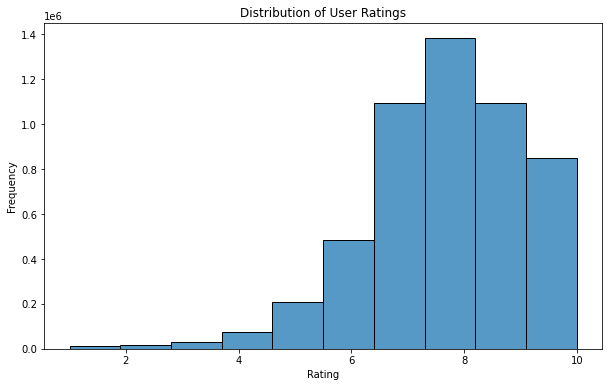

In [11]:
# Histogram of User Ratings Distibution
plt.figure(figsize = (10, 6))
sns.histplot(df_anime_rating['user_rating'], bins = 10)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Visualizing the most popular animes by the number of ratings.

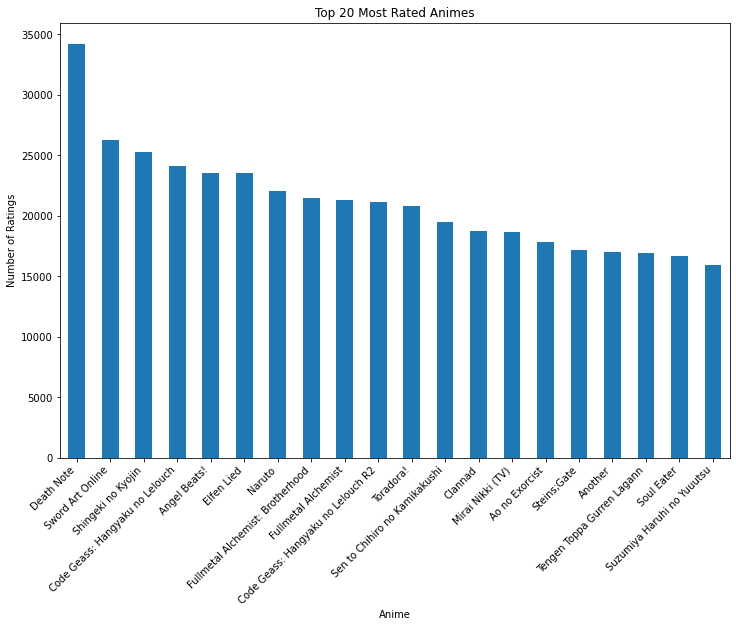

In [12]:
# Grouping by anime and count the number of ratings
anime_ratings = df_anime_rating.groupby('name')['user_rating'].count().sort_values(ascending = False).head(20)

# Bar plot for top 20 most rated animes
plt.figure(figsize = (12, 8))
anime_ratings.plot(kind = 'bar')
plt.title('Top 20 Most Rated Animes')
plt.xlabel('Anime')
plt.ylabel('Number of Ratings')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

### Visualizing the distribution of the number of ratings per user.

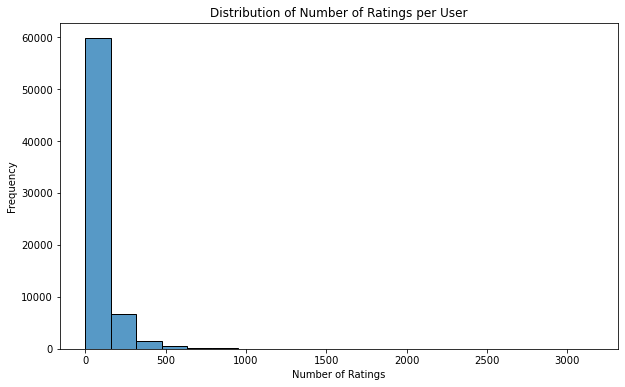

In [13]:
# Grouping by user and count the number of ratings
user_ratings = df_anime_rating.groupby('user_id')['user_rating'].count()

# Histogram of distribution of the number of ratings per user
plt.figure(figsize = (10, 6))
sns.histplot(user_ratings, bins = 20, kde = False)
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

### Stratified Sampling

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df_anime_rating is already loaded with the large dataset

# Set the sample size (e.g., 1% of the dataset)
sample_size = 0.01  # 1% of the dataset

# Perform stratified sampling based on the 'type' column
df_anime_rating_subset, _ = train_test_split(
    df_anime_rating, 
    test_size=(1-sample_size), 
    stratify=df_anime_rating['type_TV'],  # Assuming we use 'type_TV' for stratification
    random_state=42
)

# Check the shape of the new subset
print("Stratified Subset shape:", df_anime_rating_subset.shape)


Stratified Subset shape: (52474, 53)


In [ ]:
df_anime_rating_subset.to_csv('C:/Users/nisha/Downloads/df_anime_rating_subset.csv', index = False)

In [15]:
df_anime_rating_subset.head()

anime_id  \
1382111     15039   
400465      11577   
2152953      2890   
4444292     31080   
1212962     22043   

                                                                   name  \
1382111  Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai. Movie   
400465                       Steins;Gate Movie: Fuka Ryouiki no Deja vu   
2152953                                             Gake no Ue no Ponyo   
4444292                                                      Anne Happy   
1212962                                               Fairy Tail (2014)   

         episodes  average_rating  members  genre_Action  genre_Adventure  \
1382111         1            8.19    95241             0                0   
400465          1            8.61   192424             0                0   
2152953         1            7.93   140277             0                1   
4444292        12            7.17    32040             0                0   
1212962       102            8.25   255076             1                1   

         genre_Cars  genre_Comedy  genre_Dementia  ...  genre_Vampire  \
1382111           0             0               0  ...              0   
400465            0             0               0  ...              0   
2152953           0             0               0  ...              0   
4444292           0             1               0  ...              0   
1212962           0             1               0  ...              0   

         type_Movie  type_Music  type_ONA  type_OVA  type_Special  type_TV  \
1382111           1           0         0         0             0        0   
400465            1           0         0         0             0        0   
2152953           1           0         0         0             0        0   
4444292           0           0         0         0             0        1   
1212962           0           0         0         0             0        1   

         type_Unknown  user_id  user_rating  
1382111             0    40758           10  
400465              0    48407           10  
2152953             0    68175            8  
4444292             0    37588            7  
1212962             0     5073            8  

[5 rows x 53 columns]

In [16]:
# Sort the DataFrame by 'anime_id'
df_anime_rating_subset = df_anime_rating_subset.sort_values(by='anime_id')

# Reset the index (this effectively removes the old index column)
df_anime_rating_subset = df_anime_rating_subset.reset_index(drop=True)

# Check the shape of the new subset
print("Subset shape:", df_anime_rating_subset.shape)

Subset shape: (52474, 53)


In [17]:
df_anime_rating_subset.tail()

anime_id                     name  episodes  average_rating  members  \
52469     34240                  Shelter         1            8.38    71136   
52470     34240                  Shelter         1            8.38    71136   
52471     34240                  Shelter         1            8.38    71136   
52472     34240                  Shelter         1            8.38    71136   
52473     34325  Pokemon XYandZ Specials         2            7.05     1454   

       genre_Action  genre_Adventure  genre_Cars  genre_Comedy  \
52469             0                0           0             0   
52470             0                0           0             0   
52471             0                0           0             0   
52472             0                0           0             0   
52473             1                1           0             1   

       genre_Dementia  ...  genre_Vampire  type_Movie  type_Music  type_ONA  \
52469               0  ...              0           0           1         0   
52470               0  ...              0           0           1         0   
52471               0  ...              0           0           1         0   
52472               0  ...              0           0           1         0   
52473               0  ...              0           0           0         0   

       type_OVA  type_Special  type_TV  type_Unknown  user_id  user_rating  
52469         0             0        0             0    12671            9  
52470         0             0        0             0     1928            6  
52471         0             0        0             0    32235            8  
52472         0             0        0             0    70879            9  
52473         0             1        0             0    33915            7  

[5 rows x 53 columns]

In [18]:
# Find unique values in the 'name' attribute
unique_names = df_anime_rating_subset['name'].unique()

# Print the number of unique names
print(f"Number of unique anime names: {len(unique_names)}")


Number of unique anime names: 3985


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns and handle missing values if any
df_numeric = df_anime_rating_subset.dropna().select_dtypes(include=['number'])

# Compute pairwise correlation of numeric columns
correlation_matrix = df_numeric.corr()


In [20]:
df_numeric.head()

anime_id  episodes  average_rating  members  genre_Action  genre_Adventure  \
0         1        26            8.82   486824             1                1   
1         1        26            8.82   486824             1                1   
2         1        26            8.82   486824             1                1   
3         1        26            8.82   486824             1                1   
4         1        26            8.82   486824             1                1   

   genre_Cars  genre_Comedy  genre_Dementia  genre_Demons  ...  genre_Vampire  \
0           0             1               0             0  ...              0   
1           0             1               0             0  ...              0   
2           0             1               0             0  ...              0   
3           0             1               0             0  ...              0   
4           0             1               0             0  ...              0   

   type_Movie  type_Music  type_ONA  type_OVA  type_Special  type_TV  \
0           0           0         0         0             0        1   
1           0           0         0         0             0        1   
2           0           0         0         0             0        1   
3           0           0         0         0             0        1   
4           0           0         0         0             0        1   

   type_Unknown  user_id  user_rating  
0             0     7738           10  
1             0    51512           10  
2             0    52339            9  
3             0    54578           10  
4             0    10540            9  

[5 rows x 52 columns]

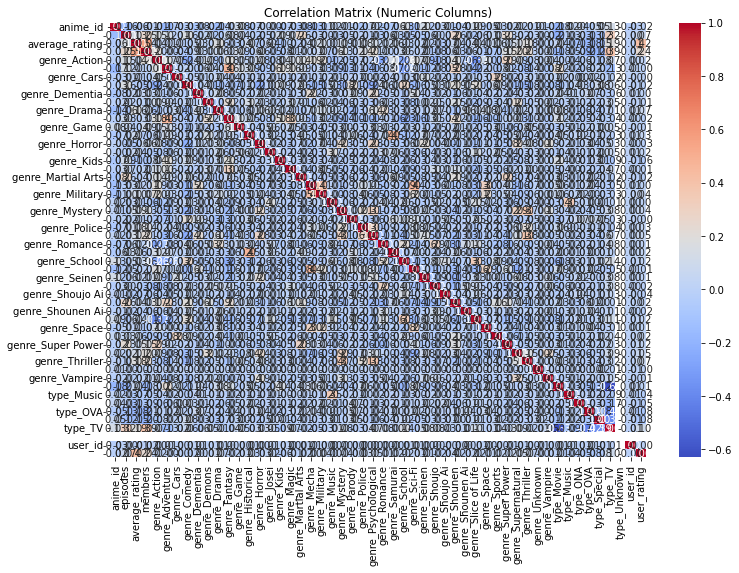

In [21]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()

In [133]:
# Find and print columns with correlation greater than 0.7
high_corr = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1.0)
high_corr_pairs = high_corr.stack().index[high_corr.stack()].tolist()

if not high_corr_pairs:
    print("No columns have correlation greater than 0.7.")
else:
    print("Columns with correlation greater than 0.7:")
    for pair in high_corr_pairs:
        print(pair)

No columns have correlation greater than 0.7.


In [23]:

# Define columns to scale and columns to keep as they are
columns_to_scale = ['episodes', 'average_rating', 'members', 'user_rating']
columns_to_keep = [
    'anime_id', 'genre_Action', 'genre_Adventure', 'genre_Cars',
    'genre_Comedy', 'genre_Dementia', 'genre_Demons', 'genre_Drama',
    'genre_Fantasy', 'genre_Game', 'genre_Historical', 'genre_Horror',
    'genre_Josei', 'genre_Kids', 'genre_Magic', 'genre_Martial Arts',
    'genre_Mecha', 'genre_Military', 'genre_Music', 'genre_Mystery',
    'genre_Parody', 'genre_Police', 'genre_Psychological', 'genre_Romance',
    'genre_Samurai', 'genre_School', 'genre_Sci-Fi', 'genre_Seinen',
    'genre_Shoujo', 'genre_Shoujo Ai', 'genre_Shounen', 'genre_Shounen Ai',
    'genre_Slice of Life', 'genre_Space', 'genre_Sports', 'genre_Super Power',
    'genre_Supernatural', 'genre_Thriller', 'genre_Unknown', 'genre_Vampire',
    'type_Movie', 'type_Music', 'type_ONA', 'type_OVA', 'type_Special',
    'type_TV', 'type_Unknown', 'user_id'
]




In [116]:
df_numeric[columns_to_keep].tail()

anime_id  genre_Action  genre_Adventure  genre_Cars  genre_Comedy  \
52469     34240             0                0           0             0   
52470     34240             0                0           0             0   
52471     34240             0                0           0             0   
52472     34240             0                0           0             0   
52473     34325             1                1           0             1   

       genre_Dementia  genre_Demons  genre_Drama  genre_Fantasy  genre_Game  \
52469               0             0            0              0           0   
52470               0             0            0              0           0   
52471               0             0            0              0           0   
52472               0             0            0              0           0   
52473               0             0            0              1           0   

       ...  genre_Unknown  genre_Vampire  type_Movie  type_Music  type_ONA  \
52469  ...              0              0           0           1         0   
52470  ...              0              0           0           1         0   
52471  ...              0              0           0           1         0   
52472  ...              0              0           0           1         0   
52473  ...              0              0           0           0         0   

       type_OVA  type_Special  type_TV  type_Unknown  user_id  
52469         0             0        0             0    12671  
52470         0             0        0             0     1928  
52471         0             0        0             0    32235  
52472         0             0        0             0    70879  
52473         0             1        0             0    33915  

[5 rows x 48 columns]

In [136]:
# Scale the selected columns
scaler = StandardScaler()
df_numeric_scaled_array = scaler.fit_transform(df_numeric[columns_to_scale])

# Convert the scaled array back to a DataFrame
df_numeric_scaled = pd.DataFrame(df_numeric_scaled_array, columns=columns_to_scale)


In [137]:
# Combine the scaled numeric columns with the unscaled columns
df_combined = pd.concat([df_numeric_scaled, df_numeric[columns_to_keep]], axis=1)

In [138]:
# Check the first few rows of the combined DataFrame
df_combined.head()

episodes  average_rating  members  user_rating  anime_id  genre_Action  \
0      0.14            1.61     1.46         1.36         1             1   
1      0.14            1.61     1.46         1.36         1             1   
2      0.14            1.61     1.46         0.71         1             1   
3      0.14            1.61     1.46         1.36         1             1   
4      0.14            1.61     1.46         0.71         1             1   

   genre_Adventure  genre_Cars  genre_Comedy  genre_Dementia  ...  \
0                1           0             1               0  ...   
1                1           0             1               0  ...   
2                1           0             1               0  ...   
3                1           0             1               0  ...   
4                1           0             1               0  ...   

   genre_Unknown  genre_Vampire  type_Movie  type_Music  type_ONA  type_OVA  \
0              0              0           0           0         0         0   
1              0              0           0           0         0         0   
2              0              0           0           0         0         0   
3              0              0           0           0         0         0   
4              0              0           0           0         0         0   

   type_Special  type_TV  type_Unknown  user_id  
0             0        1             0     7738  
1             0        1             0    51512  
2             0        1             0    52339  
3             0        1             0    54578  
4             0        1             0    10540  

[5 rows x 52 columns]

In [28]:
# Save column names
column_names = df_combined.columns.tolist()

In [29]:
column_names

['episodes',
 'average_rating',
 'members',
 'user_rating',
 'anime_id',
 'genre_Action',
 'genre_Adventure',
 'genre_Cars',
 'genre_Comedy',
 'genre_Dementia',
 'genre_Demons',
 'genre_Drama',
 'genre_Fantasy',
 'genre_Game',
 'genre_Historical',
 'genre_Horror',
 'genre_Josei',
 'genre_Kids',
 'genre_Magic',
 'genre_Martial Arts',
 'genre_Mecha',
 'genre_Military',
 'genre_Music',
 'genre_Mystery',
 'genre_Parody',
 'genre_Police',
 'genre_Psychological',
 'genre_Romance',
 'genre_Samurai',
 'genre_School',
 'genre_Sci-Fi',
 'genre_Seinen',
 'genre_Shoujo',
 'genre_Shoujo Ai',
 'genre_Shounen',
 'genre_Shounen Ai',
 'genre_Slice of Life',
 'genre_Space',
 'genre_Sports',
 'genre_Super Power',
 'genre_Supernatural',
 'genre_Thriller',
 'genre_Unknown',
 'genre_Vampire',
 'type_Movie',
 'type_Music',
 'type_ONA',
 'type_OVA',
 'type_Special',
 'type_TV',
 'type_Unknown',
 'user_id']

-----------------------

### ELBOW METHOD

In [30]:
def determine_optimal_clusters(data, max_k):
    iters = range(1, max_k+1)
    sse = []
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(iters, sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method for Optimal k')
    plt.show()

In [31]:
# Count missing values in each column
missing_values_anime = df_combined.isna().sum()
missing_values_anime

episodes               0
average_rating         0
members                0
user_rating            0
anime_id               0
genre_Action           0
genre_Adventure        0
genre_Cars             0
genre_Comedy           0
genre_Dementia         0
genre_Demons           0
genre_Drama            0
genre_Fantasy          0
genre_Game             0
genre_Historical       0
genre_Horror           0
genre_Josei            0
genre_Kids             0
genre_Magic            0
genre_Martial Arts     0
genre_Mecha            0
genre_Military         0
genre_Music            0
genre_Mystery          0
genre_Parody           0
genre_Police           0
genre_Psychological    0
genre_Romance          0
genre_Samurai          0
genre_School           0
genre_Sci-Fi           0
genre_Seinen           0
genre_Shoujo           0
genre_Shoujo Ai        0
genre_Shounen          0
genre_Shounen Ai       0
genre_Slice of Life    0
genre_Space            0
genre_Sports           0
genre_Super Power      0


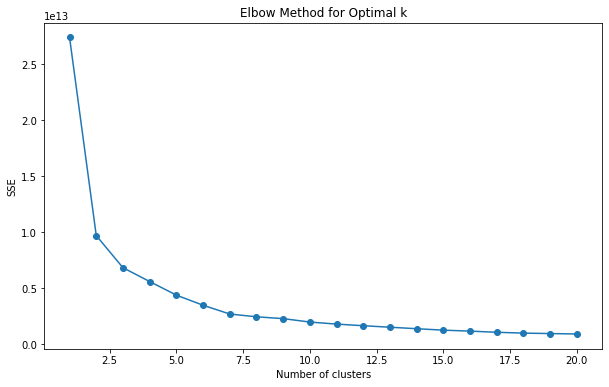

In [32]:
# Displaying the plot for the Elbow Method
determine_optimal_clusters(df_combined, 20)

#### KMeans with optimal k from Elbow Method

In [33]:
optimal_k= 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_combined)

KMeans(n_clusters=5, random_state=42)

In [34]:
clusters = kmeans.predict(df_combined)

In [35]:
clusters

array([0, 4, 4, ..., 3, 1, 3])

In [36]:
pd.DataFrame(clusters, columns=["Cluster"])

Cluster
0            0
1            4
2            4
3            4
4            0
5            2
6            4
7            2
8            2
9            0
10           2
11           4
12           4
13           4
14           2
15           0
16           0
17           4
18           4
19           4
20           4
21           4
22           0
23           0
24           4
25           0
26           2
27           0
28           4
29           2
30           2
31           0
32           4
33           2
34           4
35           4
36           2
37           0
38           4
39           0
40           4
41           4
42           2
43           0
44           2
45           4
46           2
47           4
48           2
49           4
50           1
51           2
52           0
53           2
54           0
55           2
56           4
57           4
58           2
59           1
60           4
61           0
62           0
63           0
64           4
65           4
66           0
67           1
68           4
69           4
70           2
71           2
72           0
73           2
74           0
75           0
76           4
77           2
78           2
79           2
80           4
81           2
82           4
83           1
84           4
85           2
86           1
87           4
88           2
89           2
90           0
91           2
92           2
93           4
94           4
95           2
96           2
97           1
98           0
99           2
100          4
101          1
102          2
103          0
104          2
105          2
106          4
107          2
108          1
109          1
110          4
111          0
112          4
113          4
114          1
115          4
116          4
117          0
118          1
119          2
120          1
121          4
122          1
123          4
124          1
125          1
126          4
127          4
128          4
129          2
130          4
131          1
132          0
133          4
134          0
135          1
136          2
137          0
138          1
139          4
140          0
141          1
142          4
143          4
144          2
145          2
146          4
147          2
148          0
149          2
150          2
151          0
152          4
153          0
154          4
155          4
156          2
157          4
158          2
159          0
160          2
161          4
162          4
163          2
164          2
165          4
166          1
167          1
168          0
169          0
170          2
171          4
172          4
173          1
174          4
175          0
176          4
177          0
178          4
179          4
180          4
181          0
182          0
183          2
184          4
185          4
186          4
187          4
188          4
189          2
190          1
191          4
192          1
193          4
194          4
195          2
196          4
197          0
198          4
199          0
200          4
201          4
202          4
203          4
204          0
205          0
206          0
207          4
208          1
209          2
210          0
211          2
212          0
213          4
214          0
215          2
216          2
217          0
218          4
219          4
220          4
221          2
222          0
223          2
224          4
225          1
226          4
227          2
228          1
229          0
230          4
231          2
232          4
233          0
234          4
235          4
236          2
237          4
238          2
239          0
240          4
241          2
242          2
243          2
244          2
245          2
246          2
247          4
248          4
249          2
250          2
251          1
252          2
253          4
254          2
255          4
256          0
257          0
258          0
259          2
260          1
261          4
262          4
263          0
264          4
265          4
26

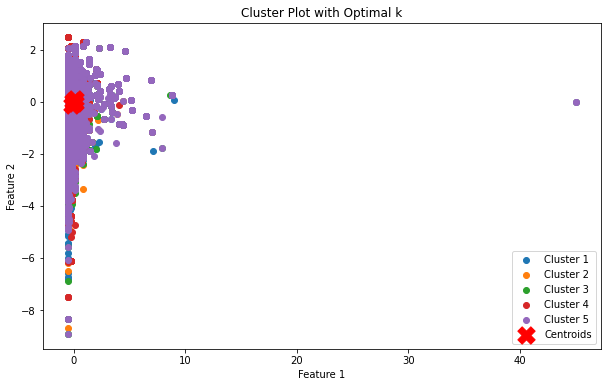

In [37]:
# Plot the clusters
plt.figure(figsize=(10, 6))

for i in range(optimal_k):
    plt.scatter(df_combined.iloc[clusters == i, 0], df_combined.iloc[clusters == i, 1], label=f'Cluster {i+1}')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Plot with Optimal k')
plt.legend()
plt.show()

#### The centroids provide an aggregate representation and a characterization of each cluster.

In [38]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=column_names)
centroids

episodes  average_rating  members  user_rating  anime_id  genre_Action  \
0     -0.02            0.00     0.01        -0.01  9,257.83          0.45   
1     -0.04            0.04     0.04         0.02 11,385.59          0.45   
2      0.10            0.09     0.08         0.04  4,815.04          0.45   
3     -0.20           -0.11    -0.03        -0.01 21,866.62          0.44   
4      0.06           -0.06    -0.09        -0.03  3,388.89          0.45   

   genre_Adventure  genre_Cars  genre_Comedy  genre_Dementia  ...  \
0             0.23        0.00          0.45            0.01  ...   
1             0.22        0.00          0.44            0.01  ...   
2             0.26        0.00          0.45            0.01  ...   
3             0.17        0.00          0.44            0.00  ...   
4             0.29        0.00          0.45            0.02  ...   

   genre_Unknown  genre_Vampire  type_Movie  type_Music  type_ONA  type_OVA  \
0           0.00           0.03        0.15        0.00      0.02      0.08   
1           0.00           0.03        0.14        0.00      0.01      0.07   
2           0.00           0.03        0.19        0.00      0.01      0.07   
3           0.00           0.02        0.07        0.00      0.02      0.06   
4           0.00           0.03        0.20        0.00      0.01      0.10   

   type_Special  type_TV  type_Unknown   user_id  
0          0.07     0.68          0.00  8,882.25  
1          0.07     0.70          0.00 65,812.15  
2          0.07     0.66          0.00 26,890.77  
3          0.08     0.77          0.00 36,067.00  
4          0.06     0.63          0.00 51,209.37  

[5 rows x 52 columns]

In [39]:
def cluster_sizes(clusters):
    size = {}
    cluster_labels = np.unique(clusters)

    for c in cluster_labels:
        size[c] = np.sum(clusters == c)

    return size

In [40]:
size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  12490
Size of Cluster 1 =  9178
Size of Cluster 2 =  11292
Size of Cluster 3 =  6253
Size of Cluster 4 =  13261


In [41]:
silhouettes = metrics.silhouette_samples(df_combined, clusters)
print(silhouettes[:20])

[0.45205515 0.65367519 0.64173204 0.58776326 0.35880297 0.53599033
 0.16185496 0.66178039 0.50871276 0.00304187 0.65403243 0.65722213
 0.50455744 0.65450597 0.36996062 0.10136983 0.40858538 0.39357905
 0.54700399 0.47976365]


In [42]:
print(silhouettes.mean())

0.3894895719536264


In [43]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    plt.show()
    
    return

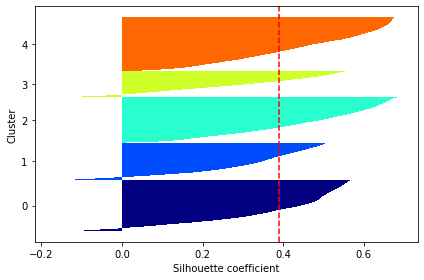

In [44]:
plot_silhouettes(df_combined, clusters)

In [45]:
def plot_silhouettes_cosine(data, clusters, metric='cosine'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='cosine')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    plt.show()
    
    return

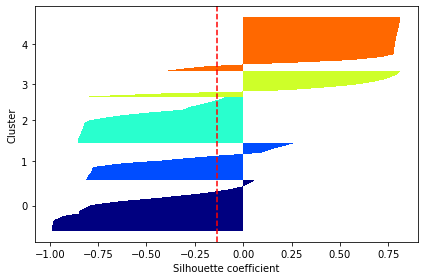

In [46]:
plot_silhouettes_cosine(df_combined, clusters)

In [47]:
data = df_combined.values

# Step 1: Fit PCA without specifying the number of components
pca = PCA()
pca.fit(data)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

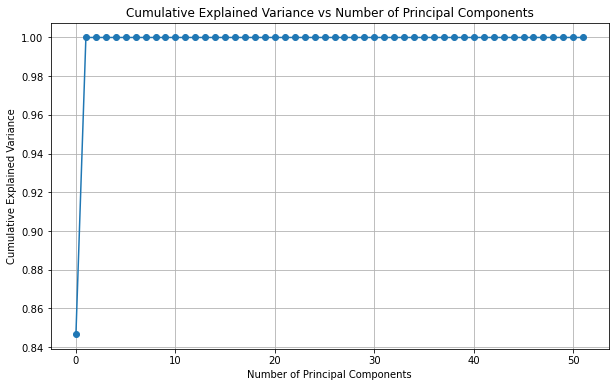

In [48]:
# Step 2: Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.grid(True)
plt.show()

In [49]:
# Step 3: Determine the number of components that explain at least 95% of the variance
threshold = 0.95
num_components = np.where(cumulative_explained_variance >= threshold)[0][0] + 1

In [50]:
print(f'Number of components that explain at least {threshold*100}% of the variance: {num_components}')

Number of components that explain at least 95.0% of the variance: 2


In [51]:
# Step 4: Transform Data Using the Selected Number of Components
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(data)


In [52]:
# Step 5: Apply KMeans Clustering
optimal_k = 5  # Assuming you've determined this through a method like the elbow method

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_pca)


KMeans(n_clusters=5, random_state=42)

In [53]:
# Predict clusters for the data
clusters = kmeans.predict(data_pca)


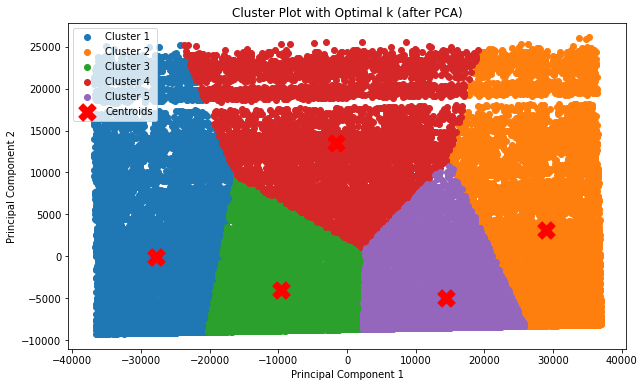

In [55]:
# Plot the clusters (assuming we want to visualize in 2D using the first two PCA components)
plt.figure(figsize=(10, 6))

for i in range(optimal_k):
    plt.scatter(data_pca[clusters == i, 0], data_pca[clusters == i, 1], label=f'Cluster {i+1}')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Plot with Optimal k (after PCA)')
plt.legend()
plt.show()

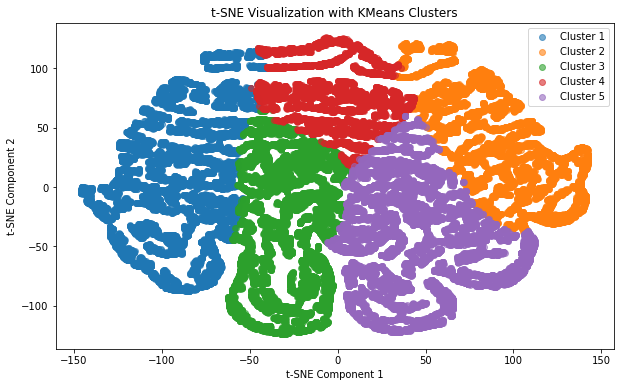

In [58]:
# Step 4: Perform t-SNE on the PCA-transformed data
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(data_pca)

# Plot t-SNE results with cluster labels
plt.figure(figsize=(10, 6))
for i in range(optimal_k):
    plt.scatter(tsne_data[clusters == i, 0], tsne_data[clusters == i, 1], label=f'Cluster {i+1}', alpha=0.6)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization with KMeans Clusters')
plt.legend()
plt.show()

### SILHOUETTE SCORE METHOD

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def silhouette_analysis(data, max_k):
    iters = range(2, max_k + 1)
    silhouette_scores = []
    
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        
    optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
    
    # Plotting the silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis for Optimal k')
    plt.show()
    
    return optimal_k, silhouette_scores

''''max(silhouette_scores) finds the highest silhouette score in the list.
    silhouette_scores.index(max(silhouette_scores)) finds the index of this highest score.
    + 2 is added because the range of 𝑘 values in iters starts from 2, meaning the index 0 corresponds to 𝑘=2'''

"'max(silhouette_scores) finds the highest silhouette score in the list.\n    silhouette_scores.index(max(silhouette_scores)) finds the index of this highest score.\n    + 2 is added because the range of 𝑘 values in iters starts from 2, meaning the index 0 corresponds to 𝑘=2"

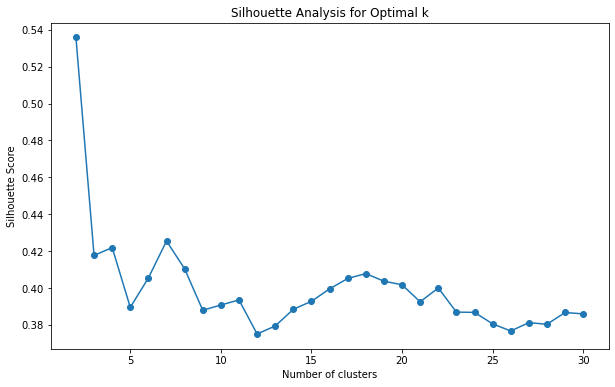

In [60]:
# Find optimal number of clusters using silhouette score
max_clusters = 30
optimal_clusters_silhouette, silhouette_scores = silhouette_analysis(df_combined, 30)

In [61]:
silhouette_scores

[0.5358347471624154,
 0.41762900904803235,
 0.4218952498583229,
 0.3894895719536264,
 0.4054201163604971,
 0.42545983323863823,
 0.41034857277521525,
 0.38788759962469593,
 0.39074015701515474,
 0.3934944243483669,
 0.37503727397552067,
 0.37937673770382374,
 0.38841191374096795,
 0.39274966673428424,
 0.39949083282519465,
 0.4051292066596256,
 0.40779409480805073,
 0.40364855078925044,
 0.40172847162063097,
 0.3924830908965716,
 0.39998114300904586,
 0.3869055972961062,
 0.38673346635227374,
 0.38053300037175597,
 0.3766612318670483,
 0.3811772101727399,
 0.3803100507362298,
 0.38668327322378626,
 0.38591749137485526]

In [62]:
print(f'The optimal number of clusters is {optimal_clusters_silhouette}')

The optimal number of clusters is 2


In [63]:
# Perform KMeans clustering with optimal number of clusters (Euclidean distance)
kmeans_silhouette = KMeans(n_clusters=optimal_clusters_silhouette, random_state=42)
cluster_labels_silhouette = kmeans_silhouette.fit_predict(df_combined)

In [64]:
cluster_labels_silhouette

array([0, 1, 1, ..., 0, 1, 0])

In [65]:
len(cluster_labels_silhouette)

52474

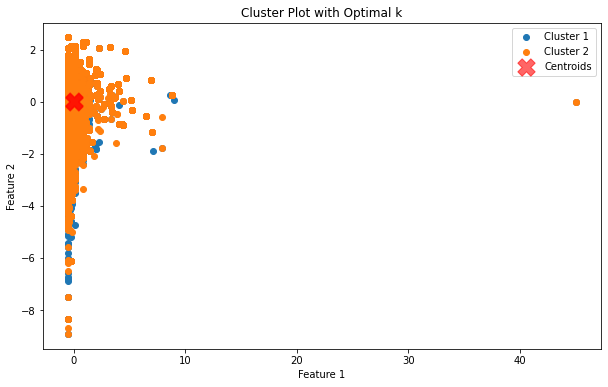

In [66]:
import matplotlib.pyplot as plt

data = df_combined.values

# Plot the clusters
plt.figure(figsize=(10, 6))

# Create a scatter plot of the data points
for i in range(optimal_clusters_silhouette):
    plt.scatter(data[cluster_labels_silhouette == i, 0], data[cluster_labels_silhouette == i, 1], label=f'Cluster {i+1}')

# Plot the cluster centroids
centroids = kmeans_silhouette.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', alpha=0.6, label='Centroids', marker='X')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Plot with Optimal k')
plt.legend()
plt.show()


In [67]:
size = cluster_sizes(cluster_labels_silhouette)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  26251
Size of Cluster 1 =  26223


In [68]:
silhouettes = metrics.silhouette_samples(df_combined, cluster_labels_silhouette)
print(silhouettes[:20])

[0.6500005  0.6164601  0.62853586 0.65342178 0.65481343 0.56927775
 0.67531477 0.41596827 0.57936972 0.64401843 0.40185845 0.61122737
 0.43925356 0.6153416  0.09148858 0.64828834 0.65340595 0.67618215
 0.46744173 0.67114054]


In [69]:
print(silhouettes.mean())

0.5358347471624154


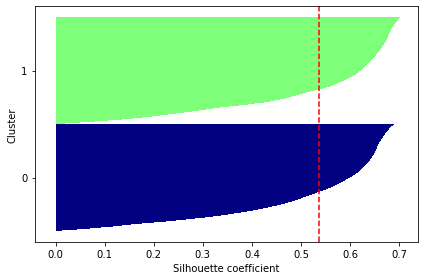

In [70]:
plot_silhouettes(df_combined, cluster_labels_silhouette)

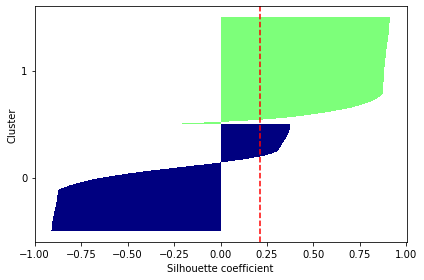

In [71]:
plot_silhouettes_cosine(df_combined, cluster_labels_silhouette)

In [72]:
# Step 1: Fit PCA without specifying the number of components
pca = PCA()
pca.fit(data)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

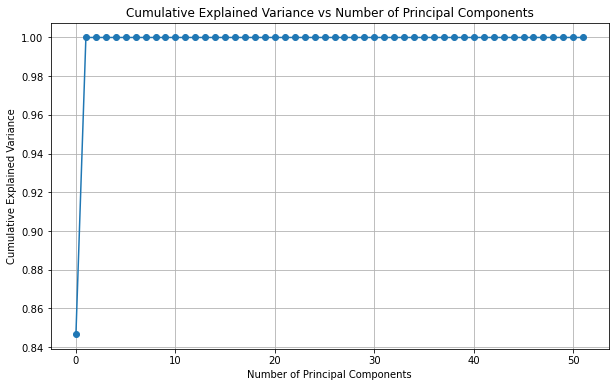

In [73]:
# Step 2: Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.grid(True)
plt.show()

In [74]:
# Step 3: Determine the number of components that explain at least 95% of the variance
threshold = 0.95
num_components = np.where(cumulative_explained_variance >= threshold)[0][0] + 1

In [76]:
print(f'Number of components that explain at least {threshold*100}% of the variance: {num_components}')

Number of components that explain at least 95.0% of the variance: 2


In [77]:
# Step 4: Transform Data Using the Selected Number of Components
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(data)


In [90]:
# Step 5: Apply KMeans Clustering
optimal_k = 2  # we've determined this through silhouette method

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_pca)


KMeans(n_clusters=2, random_state=42)

In [91]:
# Predict clusters for the data
clusters = kmeans.predict(data_pca)


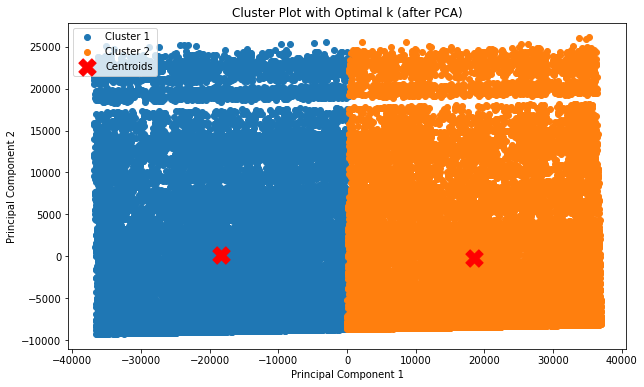

In [92]:
# Plot the clusters (assuming we want to visualize in 2D using the first two PCA components)
plt.figure(figsize=(10, 6))

for i in range(optimal_k):
    plt.scatter(data_pca[clusters == i, 0], data_pca[clusters == i, 1], label=f'Cluster {i+1}')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Plot with Optimal k (after PCA)')
plt.legend()
plt.show()

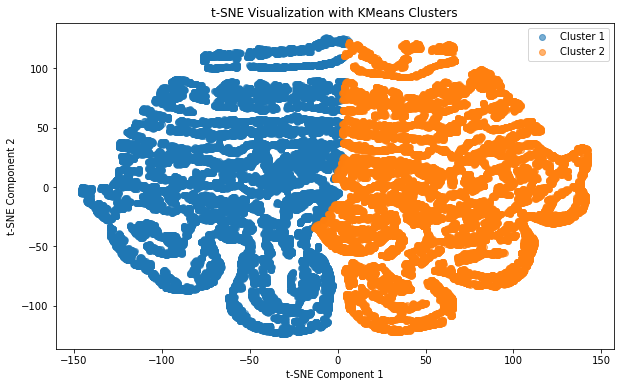

In [93]:
# Step 4: Perform t-SNE on the PCA-transformed data
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(data_pca)

# Plot t-SNE results with cluster labels
plt.figure(figsize=(10, 6))
for i in range(optimal_k):
    plt.scatter(tsne_data[clusters == i, 0], tsne_data[clusters == i, 1], label=f'Cluster {i+1}', alpha=0.6)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization with KMeans Clusters')
plt.legend()
plt.show()

## DBSCAN

In [102]:
column_names

['episodes',
 'average_rating',
 'members',
 'user_rating',
 'anime_id',
 'genre_Action',
 'genre_Adventure',
 'genre_Cars',
 'genre_Comedy',
 'genre_Dementia',
 'genre_Demons',
 'genre_Drama',
 'genre_Fantasy',
 'genre_Game',
 'genre_Historical',
 'genre_Horror',
 'genre_Josei',
 'genre_Kids',
 'genre_Magic',
 'genre_Martial Arts',
 'genre_Mecha',
 'genre_Military',
 'genre_Music',
 'genre_Mystery',
 'genre_Parody',
 'genre_Police',
 'genre_Psychological',
 'genre_Romance',
 'genre_Samurai',
 'genre_School',
 'genre_Sci-Fi',
 'genre_Seinen',
 'genre_Shoujo',
 'genre_Shoujo Ai',
 'genre_Shounen',
 'genre_Shounen Ai',
 'genre_Slice of Life',
 'genre_Space',
 'genre_Sports',
 'genre_Super Power',
 'genre_Supernatural',
 'genre_Thriller',
 'genre_Unknown',
 'genre_Vampire',
 'type_Movie',
 'type_Music',
 'type_ONA',
 'type_OVA',
 'type_Special',
 'type_TV',
 'type_Unknown',
 'user_id']

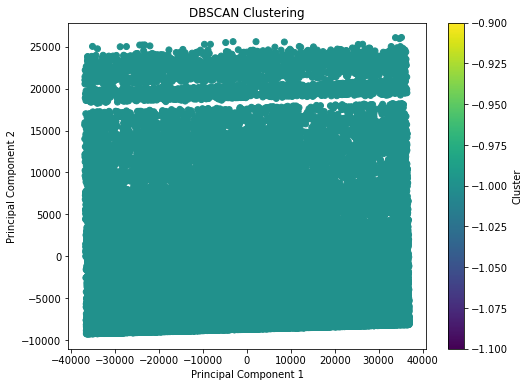

In [142]:
# Set up DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(df_combined)

# Add clusters to DataFrame
df_combined['cluster'] = clusters

# Perform PCA for visualization
pca = PCA(n_components=2)
df_combined_pca = pca.fit_transform(df_combined)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_combined_pca[:, 0], df_combined_pca[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [130]:
df_combined.head()

episodes  average_rating  members  user_rating  anime_id  genre_Action  \
0      0.14            1.61     1.46         1.36         1             1   
1      0.14            1.61     1.46         1.36         1             1   
2      0.14            1.61     1.46         0.71         1             1   
3      0.14            1.61     1.46         1.36         1             1   
4      0.14            1.61     1.46         0.71         1             1   

   genre_Adventure  genre_Cars  genre_Comedy  genre_Dementia  ...  \
0                1           0             1               0  ...   
1                1           0             1               0  ...   
2                1           0             1               0  ...   
3                1           0             1               0  ...   
4                1           0             1               0  ...   

   genre_Vampire  type_Movie  type_Music  type_ONA  type_OVA  type_Special  \
0              0           0           0         0         0             0   
1              0           0           0         0         0             0   
2              0           0           0         0         0             0   
3              0           0           0         0         0             0   
4              0           0           0         0         0             0   

   type_TV  type_Unknown  user_id  cluster  
0        1             0     7738       -1  
1        1             0    51512       -1  
2        1             0    52339       -1  
3        1             0    54578       -1  
4        1             0    10540       -1  

[5 rows x 53 columns]

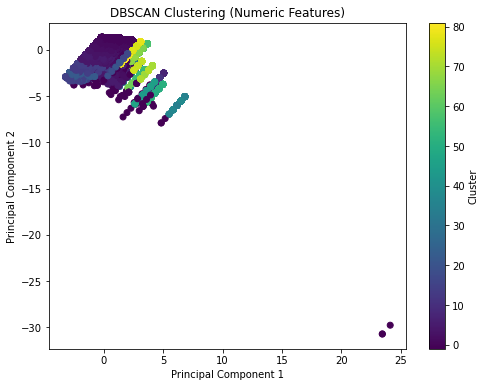

In [140]:
# Selecting only numeric features
numeric_features = ['episodes', 'members', 'user_rating']
X_numeric = df_combined[numeric_features]

# Set up DBSCAN
dbscan_numeric = DBSCAN(eps=0.5, min_samples=5)

# Fit the model and predict clusters
clusters_numeric = dbscan_numeric.fit_predict(X_numeric)



# Perform PCA for visualization
pca = PCA(n_components=2)
df_combined_pca = pca.fit_transform(X_numeric)

# Visualize clusters for numeric features
plt.figure(figsize=(8, 6))
plt.scatter(df_combined_pca[:, 0], df_combined_pca[:, 1], c=clusters_numeric, cmap='viridis')
plt.title('DBSCAN Clustering (Numeric Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
